# Capstone 3
## Full Project

Steps:
- created a new folder called Capstone3
- copied the project structure into that folder
- created a new notebook called Capstone3v1 in the notebooks section
- downloaded dataset from: https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo
- unzipped it and placed it in the data section under external
- started by importing packages [Imports](#imports)
- created important info section [Important Info](#importantinfo)
- loaded the data into variable df
- looked at head
- looked at shape
- looked at info
- [cohort analysis](#ca)

Imports<a id='imports'></a>

In [1]:
#import packages 
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Important Info<a id='importantinfo'></a>

In [2]:
#Index Link: [Important Info](#importantinfo)
#Section Link <a id='imports'></a>
downloaded_dataset='../data/external/Online Retail.xlsx'
df=pd.read_excel(downloaded_dataset)

In [3]:
df.sample(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
474056,576838,84836,ZINC METAL HEART DECORATION,12,2011-11-16 15:21:00,1.25,18075.0,United Kingdom
143913,548714,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,1,2011-04-03 15:07:00,0.85,17337.0,United Kingdom
181654,552508,22318,FIVE HEART HANGING DECORATION,1,2011-05-09 16:27:00,5.79,NaN,United Kingdom
443425,574700,20996,JAZZ HEARTS ADDRESS BOOK,4,2011-11-06 13:53:00,0.19,16033.0,United Kingdom
481793,577358,21581,SKULLS DESIGN COTTON TOTE BAG,1,2011-11-18 15:59:00,4.96,NaN,United Kingdom
346760,567202,22751,FELTCRAFT PRINCESS OLIVIA DOLL,4,2011-09-19 10:36:00,3.75,13325.0,United Kingdom
502795,578851,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2011-11-27 11:05:00,1.69,16407.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Cohort Analysis <a id='ca'></a>

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)
df['InvoiceMonth']=df['InvoiceDate'].apply(get_month)
grouping=df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth']=grouping.transform('min')

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [9]:
df[['CustomerID','InvoiceMonth','CohortMonth']].sample(15)

,CustomerID,InvoiceMonth,CohortMonth
21337,NaN,2010-12-01,NaT
316563,NaN,2011-08-01,NaT
420581,NaN,2011-10-01,NaT
427564,14911.0,2011-10-01,2010-12-01
225854,13476.0,2011-06-01,2011-03-01
191623,18230.0,2011-05-01,2010-12-01
137278,17398.0,2011-03-01,2011-03-01
53825,NaN,2011-01-01,NaT
186420,17889.0,2011-05-01,2011-01-01
342702,14367.0,2011-09-01,2011-03-01


In [10]:
def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month, day

In [11]:
invoice_year, invoice_month, _ = get_date_int(df,'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df,'CohortMonth')

In [12]:
invoice_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceMonth, Length: 541909, dtype: int64

In [13]:
years_diff=invoice_year-cohort_year
months_diff=invoice_month-cohort_month

In [14]:
years_diff

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
541904    0.0
541905    0.0
541906    0.0
541907    0.0
541908    0.0
Length: 541909, dtype: float64

In [15]:
months_diff

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
541904    4.0
541905    4.0
541906    4.0
541907    4.0
541908    4.0
Length: 541909, dtype: float64

In [16]:
df['CohortIndex']=years_diff * 12 + months_diff + 1

In [17]:
df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
28245,538633,84375,SET OF 20 KIDS COOKIE CUTTERS,1,2010-12-13 13:28:00,2.10,16726.0,United Kingdom,2010-12-01,2010-12-01,1.0
264545,560104,23209,LUNCH BAG DOILEY PATTERN,2,2011-07-14 18:56:00,1.65,17921.0,United Kingdom,2011-07-01,2011-03-01,5.0
296737,562931,22027,TEA PARTY BIRTHDAY CARD,12,2011-08-10 16:19:00,0.42,14030.0,United Kingdom,2011-08-01,2010-12-01,9.0
106714,545339,22898,CHILDRENS APRON APPLES DESIGN,8,2011-03-02 08:26:00,1.95,14292.0,United Kingdom,2011-03-01,2011-01-01,3.0
135663,547907,22969,HOMEMADE JAM SCENTED CANDLES,24,2011-03-28 12:18:00,1.45,15083.0,United Kingdom,2011-03-01,2011-03-01,1.0
290121,562353,23200,JUMBO BAG PEARS,100,2011-08-04 13:15:00,1.79,16180.0,United Kingdom,2011-08-01,2011-04-01,5.0
496763,578347,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1,2011-11-24 09:26:00,4.13,NaN,United Kingdom,2011-11-01,NaT,NaN
264168,560090,15044C,PURPLE PAPER PARASOL,1,2011-07-14 16:46:00,5.79,NaN,United Kingdom,2011-07-01,NaT,NaN
80592,543040,22561,WOODEN SCHOOL COLOURING SET,3,2011-02-02 17:06:00,1.65,17337.0,United Kingdom,2011-02-01,2011-02-01,1.0
63802,541592,20998,ROSE DU SUD OVEN GLOVE,1,2011-01-19 15:08:00,3.29,NaN,United Kingdom,2011-01-01,NaT,NaN


In [18]:
grouping=df.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['CustomerID'].apply(pd.Series.nunique)

In [19]:
cohort_data.head()

CohortMonth  CohortIndex
2010-12-01   1.0            948
             2.0            362
             3.0            317
             4.0            367
             5.0            341
Name: CustomerID, dtype: int64

In [20]:
cohort_data= cohort_data.reset_index()

In [21]:
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1.0,948
1,2010-12-01,2.0,362
2,2010-12-01,3.0,317
3,2010-12-01,4.0,367
4,2010-12-01,5.0,341


In [22]:
cohort_counts=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

In [23]:
cohort_counts #pivot table

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Retention Rate

In [24]:
cohort_sizes=cohort_counts.iloc[:,0]
retention=cohort_counts.divide(cohort_sizes,axis=0)

In [25]:
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
retention.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


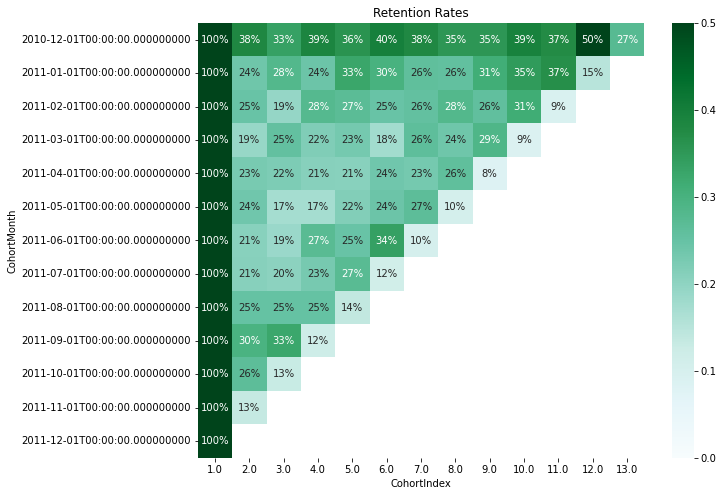

In [27]:
plt.figure(figsize=(10,8))
plt.title('Retention Rates')
sns.heatmap(data=retention,annot=True,fmt='.0%',vmin=0.0,vmax=.5,cmap='BuGn')
plt.show()

# Quantity

In [28]:
grouping=df.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['Quantity'].mean()

In [29]:
cohort_data.head()

CohortMonth  CohortIndex
2010-12-01   1.0            11.037691
             2.0            14.603253
             3.0            14.982141
             4.0            14.801090
             5.0            12.943024
Name: Quantity, dtype: float64

In [30]:
cohort_data=cohort_data.reset_index()

In [31]:
cohort_data.head()

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1.0,11.037691
1,2010-12-01,2.0,14.603253
2,2010-12-01,3.0,14.982141
3,2010-12-01,4.0,14.801090
4,2010-12-01,5.0,12.943024


In [32]:
average_quantity=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')

In [33]:
average_quantity.round(2)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.04,14.60,14.98,14.80,12.94,14.32,15.17,14.76,16.66,16.69,17.26,12.82,14.78
2011-01-01,10.02,12.57,12.34,10.94,12.23,14.90,14.23,14.39,11.40,9.88,9.09,9.54,NaN
2011-02-01,10.83,12.08,18.56,11.96,11.12,11.41,13.35,12.38,10.27,11.95,12.65,NaN,NaN
2011-03-01,9.76,9.92,12.21,9.46,13.58,12.31,13.16,12.18,10.52,8.88,NaN,NaN,NaN
2011-04-01,9.75,10.11,9.42,11.60,11.49,8.22,9.68,9.29,7.29,NaN,NaN,NaN,NaN
2011-05-01,10.87,9.03,13.88,11.81,10.90,8.67,10.15,7.37,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.33,13.68,10.46,13.28,10.23,9.76,9.26,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.72,12.70,7.14,7.84,6.01,7.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.89,5.96,5.35,5.98,6.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


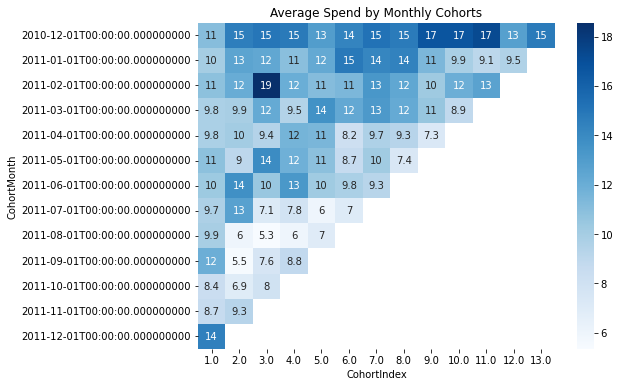

In [34]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_quantity, annot=True, cmap='Blues')
plt.show()

# Price

In [35]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = df.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price 
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price.round(1)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.2,3.2,3.2,3.6,2.9,5.0,3.2,3.2,3.5,3.0,3.3,2.8,2.8
2011-01-01,3.5,3.7,3.1,8.4,3.2,3.2,2.9,2.7,2.6,5.5,2.9,2.6,NaN
2011-02-01,3.3,4.4,4.8,3.1,3.0,2.8,2.8,3.2,2.9,2.9,3.2,NaN,NaN
2011-03-01,3.3,5.0,3.7,3.3,3.6,2.8,2.8,2.8,2.7,2.5,NaN,NaN,NaN
2011-04-01,3.4,4.0,3.3,2.7,3.0,2.9,2.9,2.8,2.6,NaN,NaN,NaN,NaN
2011-05-01,4.6,3.2,2.6,3.2,2.7,2.5,2.6,2.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.4,3.2,3.3,2.8,2.6,3.5,2.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.5,3.5,2.7,2.7,2.4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.0,5.4,5.7,7.0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


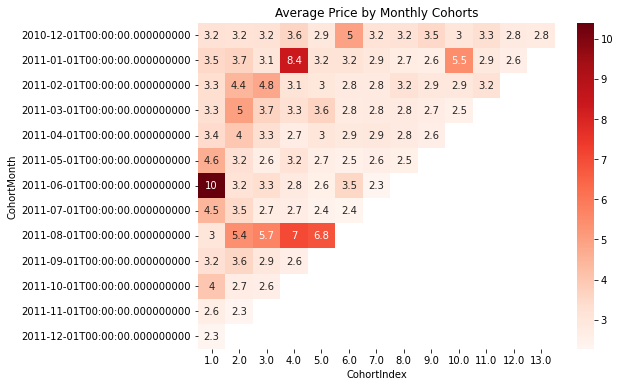

In [36]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Price by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_price, annot=True, cmap='Reds')
plt.show()

# R F M

In [37]:
df1=df
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


In [39]:
print('Min:{}; Max:{}'.format(min(df.InvoiceDate),max(df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [43]:
snapshot_date=max(df.InvoiceDate)+dt.timedelta(days=1)

In [44]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [45]:
df1['TotalSum']=df1['UnitPrice']*df1['Quantity']

In [46]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34


In [47]:
df2=df1.groupby(['CustomerID']).agg({'InvoiceDate':lambda x: (snapshot_date-x.max()).days,'InvoiceNo':'count','TotalSum':'sum'})

In [102]:
df2.head

<bound method NDFrame.head of             Recency  Frequency  MonetaryValue  Tenure
CustomerID                                           
12346.0         326          2           0.00     326
12347.0           2        182        4310.00       2
12348.0          75         31        1797.24      75
12349.0          19         73        1757.55      19
12350.0         310         17         334.40     310
...             ...        ...            ...     ...
18280.0         278         10         180.60     278
18281.0         181          7          80.82     181
18282.0           8         13         176.60       8
18283.0           4        756        2094.88       4
18287.0          43         70        1837.28      43

[4372 rows x 4 columns]>

In [103]:
df2.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'},inplace=True)

In [104]:
df2

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12346.0,326,2,0.00,326
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,75
12349.0,19,73,1757.55,19
12350.0,310,17,334.40,310
...,...,...,...,...
18280.0,278,10,180.60,278
18281.0,181,7,80.82,181
18282.0,8,13,176.60,8


In [105]:
df2['Tenure']=df2['Recency']
df2['Tenure']=df2[{'Tenure':lambda x: (snapshot_date-x.min()).days}]


C:\Users\alw-hp-17\AppData\Local\Temp\ipykernel_21372\819273626.py:2: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df2['Tenure']=df2[{'Tenure':lambda x: (snapshot_date-x.min()).days}]


In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4372 non-null   int64  
 1   Frequency      4372 non-null   int64  
 2   MonetaryValue  4372 non-null   float64
 3   Tenure         4372 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 170.8 KB


In [110]:
df2_rfmt=df2[['Recency','Frequency','MonetaryValue','Tenure']]

In [111]:
df2_rfmt

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12346.0,326,2,0.00,326
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,75
12349.0,19,73,1757.55,19
12350.0,310,17,334.40,310
...,...,...,...,...
18280.0,278,10,180.60,278
18281.0,181,7,80.82,181
18282.0,8,13,176.60,8


In [123]:
df2_rfmt = df2_rfmt[df2_rfmt.MonetaryValue != 0.00]

In [124]:
df2_rfmt

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,75
12349.0,19,73,1757.55,19
12350.0,310,17,334.40,310
12352.0,36,95,1545.41,36
...,...,...,...,...
18280.0,278,10,180.60,278
18281.0,181,7,80.82,181
18282.0,8,13,176.60,8


In [126]:
df2_rfmt_log=np.log(df2_rfmt)

In [127]:
scaler = StandardScaler()
scaler.fit(df2_rfmt_log)

StandardScaler()

In [136]:
df2_rfmt_log.describe()

,Recency,Frequency,MonetaryValue,Tenure
count,4364.000000,4364.000000,4322.000000,4364.000000
mean,3.731567,3.687951,6.524490,3.731567
std,1.465454,1.338478,1.825378,1.465454
min,0.000000,0.000000,-33.964212,0.000000
25%,2.833213,2.833213,5.711395,2.833213
50%,3.912023,3.737670,6.488521,3.912023
75%,4.962845,4.624973,7.393718,4.962845
max,5.924256,8.985070,12.540718,5.924256


In [144]:
df2_rfmt_normalized=scaler.transform(df2_rfmt_log)

In [148]:
bad_indices=np.where(np.isnan(df2_rfmt_normalized))
df2_rfmt_normalized[bad_indices]=-1

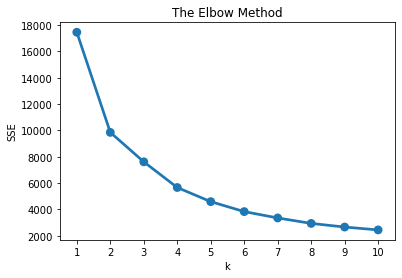

In [150]:
sse={}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df2_rfmt_normalized)
    sse[k] = kmeans.inertia_ 
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [157]:
df2_rfmt_normalized

array([[-2.07360243,  1.13280139,  1.01042983, -2.07360243],
       [ 0.39986786, -0.18976241,  0.53119372,  0.39986786],
       [-0.53718423,  0.45019618,  0.51895848, -0.53718423],
       ...,
       [-1.127511  , -0.83911007, -0.73998893, -1.127511  ],
       [-1.60055671,  2.19684433,  0.61515544, -1.60055671],
       [ 0.02022315,  0.41884041,  0.54326608,  0.02022315]])

In [158]:
df2_rfmt_normalized = pd.DataFrame(data=df2_rfmt_normalized, index=df2_rfmt.index, columns=df2_rfmt.columns)

In [159]:
df2_rfmt_normalized

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12347.0,-2.073602,1.132801,1.010430,-2.073602
12348.0,0.399868,-0.189762,0.531194,0.399868
12349.0,-0.537184,0.450196,0.518958,-0.537184
12350.0,1.368337,-0.638662,-0.390185,1.368337
12352.0,-0.101037,0.647022,0.448482,-0.101037
...,...,...,...,...
18280.0,1.293982,-1.035149,-0.727718,1.293982
18281.0,1.001122,-1.301658,-1.168258,1.001122
18282.0,-1.127511,-0.839110,-0.739989,-1.127511


In [170]:
df2_rfmt_k4

,Recency,Frequency,MonetaryValue,Tenure,Cluster
CustomerID,,,,,
12347.0,2,182,4310.00,2,1
12348.0,75,31,1797.24,75,2
12349.0,19,73,1757.55,19,2
12350.0,310,17,334.40,310,0
12352.0,36,95,1545.41,36,2
...,...,...,...,...,...
18280.0,278,10,180.60,278,0
18281.0,181,7,80.82,181,0
18282.0,8,13,176.60,8,2


In [171]:
# Melt the normalized dataset and reset the index
df2_melt = pd.melt(df2_rfmt_k4.reset_index(),
                   id_vars=['CustomerID','Cluster'],
                   value_vars=['Recency', 'Frequency', 'MonetaryValue','Tenure'],                                     
                   var_name='Metric', value_name='Value')

In [172]:
df2_melt

,CustomerID,Cluster,Metric,Value
0,12347.0,1,Recency,2.0
1,12348.0,2,Recency,75.0
2,12349.0,2,Recency,19.0
3,12350.0,0,Recency,310.0
4,12352.0,2,Recency,36.0
...,...,...,...,...
17451,18280.0,0,Tenure,278.0
17452,18281.0,0,Tenure,181.0
17453,18282.0,2,Tenure,8.0
17454,18283.0,1,Tenure,4.0


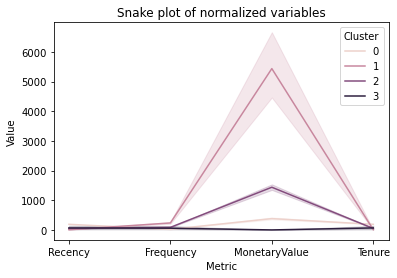

In [173]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=df2_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [174]:
# Calculate average RFM values for each cluster
cluster_avg = df2_rfmt_k4.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = df2_rfmt.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue  Tenure
Cluster                                           
0           1.06      -0.79          -0.80    1.06
1          -0.93       1.52           1.86   -0.93
2          -0.46      -0.08          -0.24   -0.46
3          -0.27      -0.38          -1.00   -0.27


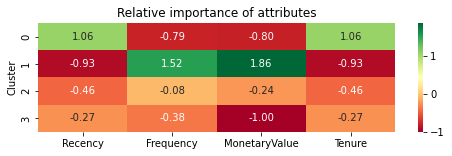

In [175]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [152]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(df2_rfmt_normalized)
cluster_labels = kmeans.labels_

In [154]:
df2_rfmt_k4 = df2_rfmt.assign(Cluster=cluster_labels)
grouped=df2_rfmt_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0         189.2      19.5         380.9  189.2  1614
1           6.6     234.5        5438.7    6.6   934
2          49.6      86.1        1438.7   49.6  1811
3          67.0      58.0           0.0   67.0     5

In [166]:
df2_rfmt_k4

,Recency,Frequency,MonetaryValue,Tenure,Cluster
CustomerID,,,,,
12347.0,2,182,4310.00,2,1
12348.0,75,31,1797.24,75,2
12349.0,19,73,1757.55,19,2
12350.0,310,17,334.40,310,0
12352.0,36,95,1545.41,36,2
...,...,...,...,...,...
18280.0,278,10,180.60,278,0
18281.0,181,7,80.82,181,0
18282.0,8,13,176.60,8,2


In [48]:
r_labels=list(range(4,0,-1))
f_labels=range(1,4)

In [49]:
r_labels

[4, 3, 2, 1]

In [50]:
recency_quartiles=pd.qcut(athru['Recency'],4,labels=r_labels)
athru['Recency_Quartile']=recency_quartiles
athru.sort_values('Recency_Quartile')

,Recency,Frequency,MonetaryValue,Recency_Quartile
CustomerID,,,,
14111.0,14,11,688.60,4
14216.0,3,59,1839.30,4
14215.0,12,109,1777.92,4
16989.0,7,12,1133.25,4
16992.0,11,95,1601.86,4
...,...,...,...,...
14459.0,155,37,1837.92,1
16838.0,197,26,582.90,1
14461.0,148,180,2103.06,1


In [51]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(beta['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(beta['Frequency'], q=3, labels=f_labels)

# Create new columns R and F
beta = beta.assign(R=r_groups.values, F=f_groups.values)

In [52]:
beta

,Recency,Frequency,MonetaryValue,Recency_Quartile,R,F
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,3,3
12348.0,75,31,1797.24,2,2,2
12349.0,19,73,1757.55,3,3,2
12350.0,310,17,334.40,1,1,1
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,3,1


In [54]:
# Create labels for MonetaryValue 
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups
m_groups = pd.qcut(beta['MonetaryValue'], q=3, labels=m_labels)

# Create new column M
beta = beta.assign(M=m_groups.values)

# Calculate RFM_Score
beta['RFM_Score'] = beta[['R','F','M']].sum(axis=1)
beta['RFM_Score'].head()

CustomerID
12346.0    3
12347.0    9
12348.0    7
12349.0    8
12350.0    3
Name: RFM_Score, dtype: int64

In [58]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 9)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
beta['RFM_Level'] = beta.apply(rfm_level, axis=1)

# Print the header with the top 5 rows to the console.
beta

,Recency,Frequency,MonetaryValue,Recency_Quartile,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1,3,Low
12347.0,2,182,4310.00,4,3,3,3,9,Top
12348.0,75,31,1797.24,2,2,2,3,7,Middle
12349.0,19,73,1757.55,3,3,2,3,8,Middle
12350.0,310,17,334.40,1,1,1,1,3,Low
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1,3,Low
18281.0,181,7,80.82,1,1,1,1,3,Low
18282.0,8,13,176.60,4,3,1,1,5,Low


In [59]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = beta.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         161.2      20.0         346.3  1919
Middle       49.3      88.2        1517.9  1758
Top           9.1     307.0        7146.9   695


# k-means clustering

D:\Users\alw-hp-17\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


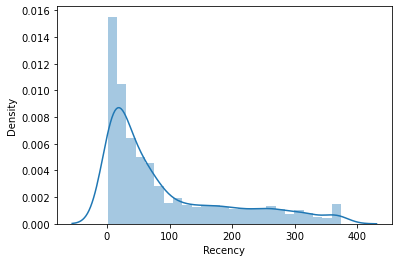

In [64]:
sns.distplot(beta['Recency'])
plt.show()

D:\Users\alw-hp-17\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


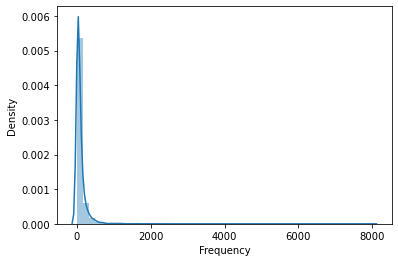

In [65]:
sns.distplot(beta['Frequency'])
plt.show()

In [68]:
frequency_log=np.log(beta['Frequency'])

D:\Users\alw-hp-17\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


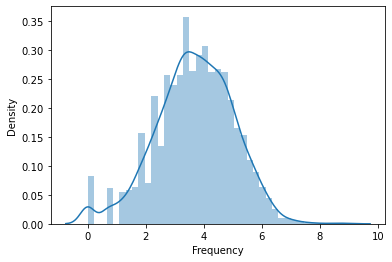

In [69]:
sns.distplot(frequency_log)
plt.show()

In [71]:
recency_log=np.log(beta['Recency'])

D:\Users\alw-hp-17\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


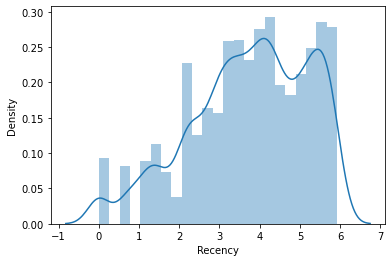

In [72]:
sns.distplot(recency_log)
plt.show()

In [74]:
beta_rfm=beta[['Recency','Frequency','MonetaryValue']]

In [75]:
beta_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,92.047118,93.053294,1898.459701
std,100.765435,232.471608,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,17.000000,293.362500
50%,50.000000,42.000000,648.075000
75%,143.000000,102.000000,1611.725000
max,374.000000,7983.000000,279489.020000


In [76]:
beta_centered=beta_rfm-beta_rfm.mean()

In [77]:
beta_centered.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4372.00,4372.00,4372.00
mean,0.00,0.00,-0.00
std,100.77,232.47,8219.35
min,-91.05,-92.05,-6186.09
25%,-75.05,-76.05,-1605.10
50%,-42.05,-51.05,-1250.38
75%,50.95,8.95,-286.73
max,281.95,7889.95,277590.56


In [78]:
beta_scaled=beta_rfm/beta_rfm.std()

In [79]:
beta_scaled.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4372.00,4372.00,4372.00
mean,0.91,0.40,0.23
std,1.00,1.00,1.00
min,0.01,0.00,-0.52
25%,0.17,0.07,0.04
50%,0.50,0.18,0.08
75%,1.42,0.44,0.20
max,3.71,34.34,34.00


In [81]:
scaler=StandardScaler()
scaler.fit(beta_rfm)
beta_normalized=scaler.transform(beta_rfm)

In [85]:
print('Mean:{}'.format(beta_normalized.mean(axis=0).round(2)))
print('Std:{}'.format(beta_normalized.std(axis=0).round(2)))

Mean:[-0.  0.  0.]
Std:[1. 1. 1.]


In [190]:
kmeans=KMeans(n_clusters=3, random_state=1)

In [191]:
kmeans.fit(beta_normalized)

KMeans(n_clusters=3, random_state=1)

In [192]:
cluster_labels=kmeans.labels_

In [193]:
beta_rfm_k3=beta_rfm.assign(Cluster=cluster_labels)

In [194]:
beta_rfm_k3

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,0.00,0
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,1
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,0
...,...,...,...,...
18280.0,278,10,180.60,0
18281.0,181,7,80.82,1
18282.0,8,13,176.60,0


In [195]:
beta_rfm_k3.groupby(['Cluster']).agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          74.0     101.0        1700.0  2723
1         122.0      58.0        1342.0  1636
2           5.0    2753.0      113494.0    13

In [196]:
sse={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=1)
    kmeans.fit(beta_normalized)
    sse[k]=kmeans.inertia_

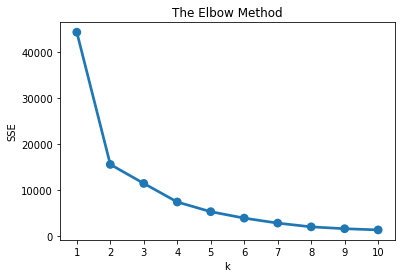

In [197]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

In [198]:
sse={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=1)
    kmeans.fit(beta_rfm)
    sse[k]=kmeans.inertia_

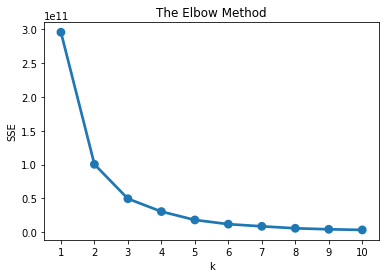

In [199]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

# Snake Plots

In [200]:
beta_normalized=pd.DataFrame(beta_normalized,index=beta_rfm.index,columns=beta_rfm.columns)
beta_normalized['Cluster']=beta_rfm_k3['Cluster']

In [201]:
beta_normalized

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,2.322023,-0.391720,-0.231001,0
12347.0,-0.893733,0.382657,0.293432,0
12348.0,-0.169196,-0.266959,-0.012316,1
12349.0,-0.725005,-0.086271,-0.017146,0
12350.0,2.163220,-0.327188,-0.190312,0
...,...,...,...,...
18280.0,1.845615,-0.357303,-0.209026,0
18281.0,0.882873,-0.370209,-0.221167,1
18282.0,-0.834182,-0.344397,-0.209513,0


In [202]:
beta_melt=pd.melt(beta_normalized.reset_index(),
                  id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Attribute',value_name='Value')

In [203]:
beta_melt.sample(15)

,CustomerID,Cluster,Attribute,Value
6167,14770.0,1,Frequency,-0.176615
12994,18123.0,0,MonetaryValue,-0.159279
4889,13014.0,0,Frequency,0.133136
4968,13126.0,0,Frequency,0.210573
10507,14727.0,0,MonetaryValue,-0.198321
5230,13487.0,1,Frequency,-0.254053
241,12640.0,0,Recency,-0.675379
11836,16527.0,1,MonetaryValue,-0.203251
3017,16425.0,0,Recency,2.083819
10114,14194.0,0,MonetaryValue,1.133832


<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

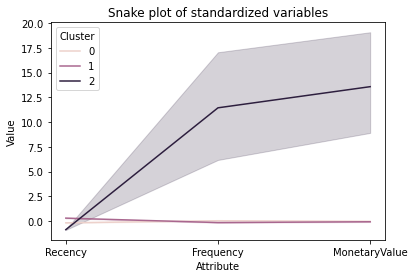

In [204]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute',y='Value',hue='Cluster',data=beta_melt)

In [205]:
cluster_avg=beta_rfm_k3.groupby(['Cluster']).mean()
population_avg=beta_rfm.mean()

In [206]:
relative_imp=cluster_avg/population_avg-1

In [207]:
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.19,0.09,-0.10
1,0.33,-0.38,-0.29
2,-0.95,28.58,58.78


<function matplotlib.pyplot.show(close=None, block=None)>

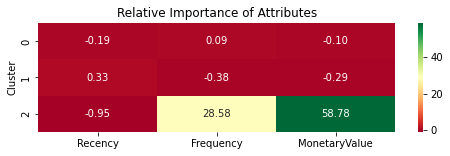

In [208]:
plt.figure(figsize=(8,2))
plt.title('Relative Importance of Attributes')
sns.heatmap(data=relative_imp,annot=True,fmt='.2f',cmap='RdYlGn')
plt.show